In [15]:
import numpy as np
from glob import glob
import cv2, os, warnings
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

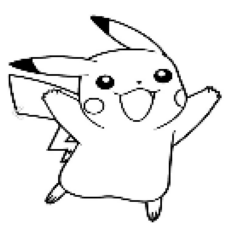

In [50]:
img = cv2.imread('피카츄_도안.jpg')
img = cv2.resize(img, (128, 128), cv2.INTER_LINEAR)
plt.axis('off'); plt.imshow(img);

In [51]:
datagen = ImageDataGenerator(
    featurewise_center=False,   # set input mean to 0 over the dataset
    samplewise_center=False,    # set each sample mean to 0
    featurewise_std_normalization=False,    # divide inputs by std of dataset
    samplewise_std_normalization=False,     # divide each input by its std
    zca_whitening=False,    # apply ZCA whitening
    zca_epsilon=1e-06,      # epsilon for ZCA whitening
    rotation_range=10,       # randomly rotate images in the range (deg 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally
    height_shift_range=0.1, # randomly shift images vertically
    shear_range=0.,         # set range for random shear
    zoom_range=0.1,         # set range for random zoom
    channel_shift_range=0., # set range for random channel shifts
    fill_mode='nearest',    # set mode for filling points outside the input boundaries
    cval=0.,                # value used for fill_mode = "constant"
    horizontal_flip=True,   # randomly flip images
    vertical_flip=False,    # randomly flip images
    rescale=None,           # set rescaling factor (applied before any other transformation)
    preprocessing_function=None,    # set function that will be applied on each input
    data_format=None,       # image data format, either "channels_first" or "channels_last"
    validation_split=0.0    # fraction of images reserved for validation
)

In [52]:
img = img.reshape(1, 128, 128, 3)
datagen.flow(x = np.array(img), y = None, batch_size = 1, save_to_dir = './content/preview',
                   save_prefix = 'pre')

In [53]:
for i, _ in enumerate(datagen.flow(np.array(img), batch_size = 1, save_to_dir='preview',save_prefix = 'pre',  save_format = 'jpg')):
    if i == 30:
        break

In [49]:
# import shutil
#shutil.rmtree('/content/preview')

In [55]:
len(os.listdir('./preview'))

31

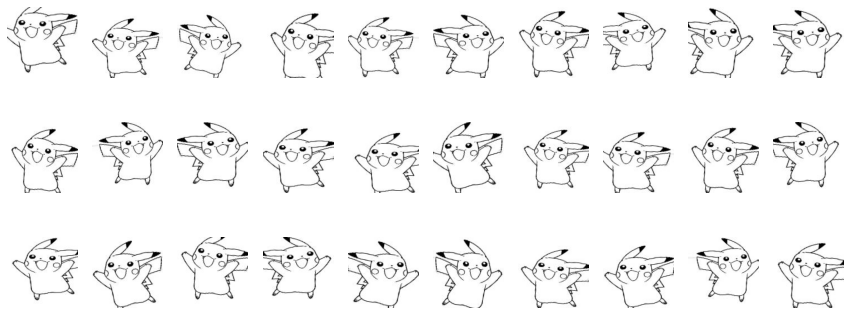

In [56]:
plt.figure(figsize=(15,6))
for i, fname in enumerate(glob('preview/*.jpg')):
    img = cv2.imread(fname)
    plt.subplot(3, 10, i+1)
    plt.imshow(img), plt.axis('off');
plt.show()